In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the datasets
train_df = pd.read_excel('../Data_Q5/Q5_train.xlsx')
test_df = pd.read_csv('../Data_Q5/Q5_test.csv')

In [3]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165.0,60,81.0,0.5,0.6,1,1.0,135,...,40,75,16.5,1.0,1.0,22,25,27,0,1
1,1,70,165.0,65,89.0,0.6,0.7,2,2.0,146,...,57,126,16.2,1.0,1.1,27,23,37,1,0
2,2,20,170.0,75,81.0,0.4,0.5,1,1.0,118,...,45,93,17.4,1.0,0.8,27,31,53,0,1
3,3,35,180.0,95,105.0,1.5,1.2,1,1.0,131,...,38,102,15.9,1.0,1.0,20,27,30,1,0
4,4,30,165.0,60,80.5,1.5,1.0,1,1.0,121,...,44,93,15.4,1.0,0.8,19,13,17,0,1


In [4]:
test_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [5]:
# Data preprocessing
train_df.drop('id', axis=1, inplace=True)  # Drop the 'id' column
test_df.drop('id', axis=1, inplace=True)  # Drop the 'id' column

In [8]:
# Check for missing values
train_df.isnull().sum()

age                       0
height(cm)             9555
weight(kg)                0
waist(cm)                 8
eyesight(left)         9564
eyesight(right)           9
hearing(left)             0
hearing(right)         9555
systolic                  0
relaxation                0
fasting blood sugar       0
Cholesterol               0
triglyceride              0
HDL                       0
LDL                       0
hemoglobin                0
Urine protein          9587
serum creatinine          0
AST                       0
ALT                       0
Gtp                       0
dental caries             0
smoking                   0
dtype: int64

In [9]:
# Use average height to fill in the missing values
train_df['height(cm)'].fillna(train_df['height(cm)'].mean(), inplace=True)

# Use average waist to fill in the missing values
train_df['waist(cm)'].fillna(train_df['waist(cm)'].mean(), inplace=True)

# Use another eye to fill in the missing values
train_df['eyesight(left)'].fillna(train_df['eyesight(right)'], inplace=True)
train_df['eyesight(right)'].fillna(train_df['eyesight(left)'], inplace=True)

# Use another ear to fill in the missing values
train_df['hearing(right)'].fillna(train_df['hearing(left)'], inplace=True)

# Use average urine protein to fill in the missing values
train_df['Urine protein'].fillna(train_df['Urine protein'].mean(), inplace=True)

In [10]:
# Check for missing values
train_df.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [11]:
# Drop Duplicates
print(f'Shape before dropping duplicates: {train_df.shape}')
train_df.drop_duplicates(inplace=True)
print(f'Shape after dropping duplicates: {train_df.shape}')

Shape before dropping duplicates: (159256, 23)
Shape after dropping duplicates: (159256, 23)


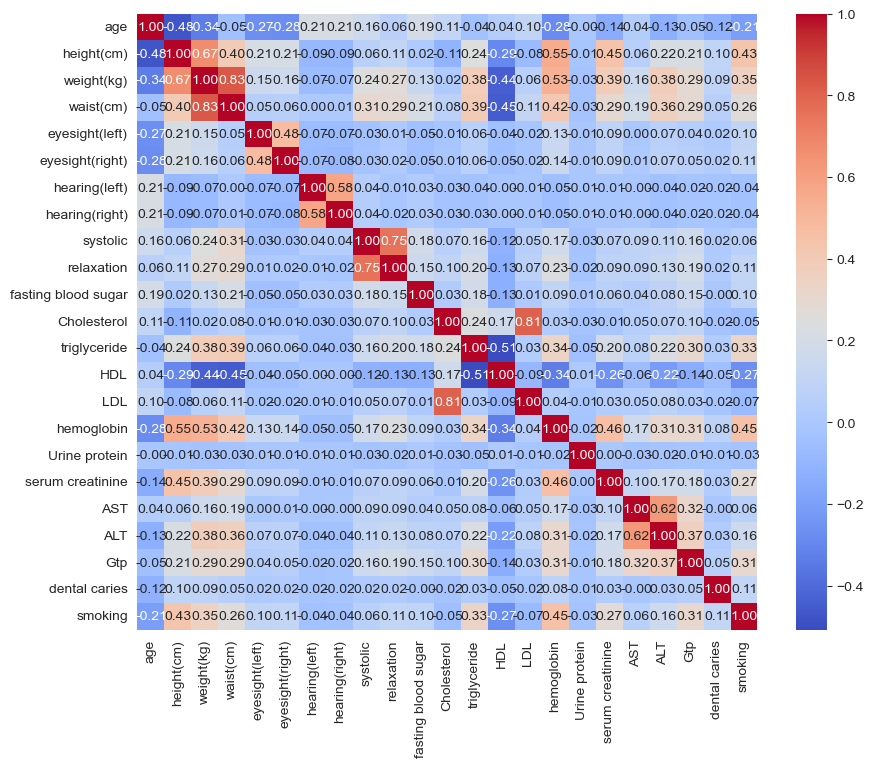

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = train_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()


In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop('smoking', axis=1))

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(scaled_features, 
                                                  train_df['smoking'], 
                                                  test_size=0.2, 
                                                  random_state=50015940)

# Model building
model = RandomForestClassifier(random_state=50015940)
model.fit(X_train, y_train)

# Validation
val_predictions = model.predict_proba(X_val)[:, 1]
val_roc_score = roc_auc_score(y_val, val_predictions)
print(f'Validation ROC Score: {val_roc_score}')

Validation ROC Score: 0.8549486895476653


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'train_df' is your DataFrame and 'smoking' is the target variable
# Standardize the features (excluding the target variable)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop('smoking', axis=1))

# Separate the features and the target
X = scaled_features
y = train_df['smoking']

# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=50015940)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

# Output the results
print("10-fold Cross-Validation ROC AUC Scores:", cv_scores)
print("Mean ROC AUC Score:", np.mean(cv_scores))


10-fold Cross-Validation ROC AUC Scores: [0.85631626 0.85139748 0.85891645 0.85204607 0.85619214 0.8557821
 0.85644239 0.86121204 0.86048624 0.85175575]
Mean ROC AUC Score: 0.8560546924546303


In [27]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'train_df' is your DataFrame and 'smoking' is the target variable
# Standardize the features (excluding the target variable)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop('smoking', axis=1))

# Separate the features and the target
X = scaled_features
y = train_df['smoking']

# Create the XGBoost Classifier model
model = XGBClassifier(random_state=50015940, use_label_encoder=False, eval_metric='logloss')

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

# Output the results
print("10-fold Cross-Validation ROC AUC Scores:", cv_scores)
print("Mean ROC AUC Score:", np.mean(cv_scores))


10-fold Cross-Validation ROC AUC Scores: [0.86515775 0.86379575 0.86604913 0.86032182 0.86497424 0.8639389
 0.86343689 0.86856772 0.86898427 0.86132222]
Mean ROC AUC Score: 0.8646548691399408


In [ ]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'train_df' is your DataFrame and 'smoking' is the target variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop('smoking', axis=1))

X = scaled_features
y = train_df['smoking']

model = LGBMClassifier(random_state=50015940)

cv_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

print("10-fold Cross-Validation ROC AUC Scores:", cv_scores)
print("Mean ROC AUC Score:", np.mean(cv_scores))

In [28]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'train_df' is your DataFrame and 'smoking' is the target variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop('smoking', axis=1))

X = scaled_features
y = train_df['smoking']

model = CatBoostClassifier(random_state=50015940, verbose=0)  # verbose=0 to silence the output

cv_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

print("10-fold Cross-Validation ROC AUC Scores:", cv_scores)
print("Mean ROC AUC Score:", np.mean(cv_scores))


10-fold Cross-Validation ROC AUC Scores: [0.86844102 0.86619451 0.87035754 0.86538048 0.86852388 0.86812672
 0.86674564 0.87264406 0.87291102 0.86618172]
Mean ROC AUC Score: 0.8685506584510667


In [13]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X = scaler.fit_transform(train_df.drop('smoking', axis=1))
y = train_df['smoking']
X_test = scaler.transform(test_df)

kf = KFold(n_splits=10, shuffle=True, random_state=50015940)
best_model = None
best_auc = 0

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = CatBoostClassifier(random_state=50015940, verbose=0)
    model.fit(X_train, y_train)

    val_predictions = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_predictions)
    print(f'Validation ROC Score: {val_auc}')
    print(f'BEST ROC Score: {best_auc}')

    if val_auc > best_auc:
        best_auc = val_auc
        best_model = model

# Use the best model for prediction
test_predictions = best_model.predict_proba(X_test)[:, 1]

Validation ROC Score: 0.8680510504525178
BEST ROC Score: 0
Validation ROC Score: 0.8673019703540474
BEST ROC Score: 0.8680510504525178
Validation ROC Score: 0.8672635145403504
BEST ROC Score: 0.8680510504525178
Validation ROC Score: 0.8750241810648655
BEST ROC Score: 0.8680510504525178
Validation ROC Score: 0.8697608607792046
BEST ROC Score: 0.8750241810648655
Validation ROC Score: 0.8675347063918801
BEST ROC Score: 0.8750241810648655
Validation ROC Score: 0.8697893483576988
BEST ROC Score: 0.8750241810648655
Validation ROC Score: 0.8674634028157314
BEST ROC Score: 0.8750241810648655
Validation ROC Score: 0.8666376272215095
BEST ROC Score: 0.8750241810648655
Validation ROC Score: 0.8674461216203608
BEST ROC Score: 0.8750241810648655


In [15]:
# Threshold for converting probabilities to binary predictions
threshold = 0.5

# Convert probabilities to binary predictions
test_df['predicted_smoking'] = (test_predictions >= threshold).astype(int)

In [16]:
test_df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,predicted_smoking
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,49,115,14.2,1,0.9,19,25,32,0,1
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,35,104,13.0,1,1.1,20,12,24,0,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,39,88,15.4,1,1.4,38,60,36,0,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,75,128,14.5,1,0.6,25,18,10,1,0
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,39,123,16.5,1,1.0,30,39,27,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,40,165,60,78.0,0.8,0.9,1,1,112,78,...,59,149,16.4,1,1.1,24,31,28,0,1
106167,40,170,85,95.0,1.2,1.2,1,1,130,90,...,44,100,16.0,2,1.0,25,31,38,0,1
106168,35,170,85,89.0,1.2,1.2,1,1,131,86,...,53,142,15.9,1,0.8,33,32,24,1,0
106169,40,160,60,67.0,0.7,0.8,1,1,120,80,...,55,103,13.9,1,0.6,42,36,32,0,0
